## A Look at the data

In [91]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sb

In [92]:
# read the csv file
df= pd.read_csv('survey_results_public.csv')
df1 = pd.read_csv('survey_results_schema.csv')

In [17]:
# number of rows and columns
df.shape

(88883, 85)

In [18]:
# hidden columns
df.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'OpenSourcer', 'OpenSource',
       'Employment', 'Country', 'Student', 'EdLevel', 'UndergradMajor',
       'EduOther', 'OrgSize', 'DevType', 'YearsCode', 'Age1stCode',
       'YearsCodePro', 'CareerSat', 'JobSat', 'MgrIdiot', 'MgrMoney',
       'MgrWant', 'JobSeek', 'LastHireDate', 'LastInt', 'FizzBuzz',
       'JobFactors', 'ResumeUpdate', 'CurrencySymbol', 'CurrencyDesc',
       'CompTotal', 'CompFreq', 'ConvertedComp', 'WorkWeekHrs', 'WorkPlan',
       'WorkChallenge', 'WorkRemote', 'WorkLoc', 'ImpSyn', 'CodeRev',
       'CodeRevHrs', 'UnitTests', 'PurchaseHow', 'PurchaseWhat',
       'LanguageWorkedWith', 'LanguageDesireNextYear', 'DatabaseWorkedWith',
       'DatabaseDesireNextYear', 'PlatformWorkedWith',
       'PlatformDesireNextYear', 'WebFrameWorkedWith',
       'WebFrameDesireNextYear', 'MiscTechWorkedWith',
       'MiscTechDesireNextYear', 'DevEnviron', 'OpSys', 'Containers',
       'BlockchainOrg', 'BlockchainIs', 'BetterLife'

In [23]:
sum(df.WorkChallenge.isnull())

20742

In [ ]:
Hobbyist,WorkWeekHrs,WorkChallenge

In [46]:
# Columns that have no missing values
df.columns[(np.sum(df.isnull())==0)]

Index(['Respondent', 'Hobbyist', 'OpenSourcer'], dtype='object')

Text(0.5, 1.0, 'Countries')

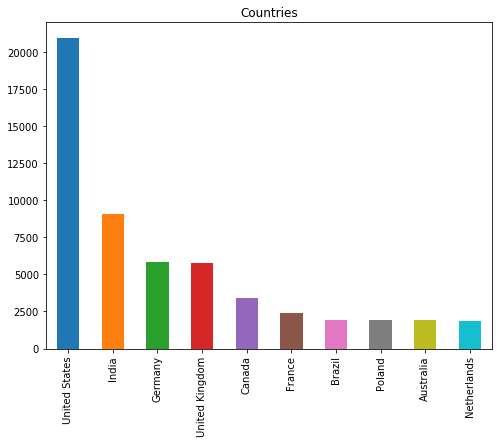

In [93]:
# plot the countries with highest developers
plt.figure(figsize=[8,6])
country=df.Country.value_counts()[:10]
country.plot(kind='bar')
plt.title('Countries')

Text(0.5, 1.0, 'Graduates')

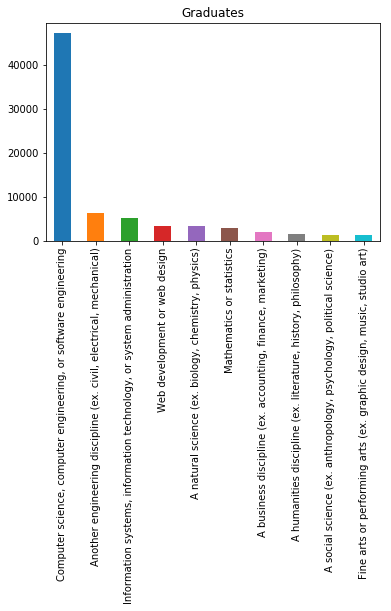

In [97]:
# plot the education background of the developers
country=df.UndergradMajor.value_counts()[:10]
country.plot(kind='bar')
plt.title('Graduates')

In [90]:
df.UndergradMajor.value_counts()

Computer science, computer engineering, or software engineering          47214
Another engineering discipline (ex. civil, electrical, mechanical)        6222
Information systems, information technology, or system administration     5253
Web development or web design                                             3422
A natural science (ex. biology, chemistry, physics)                       3232
Mathematics or statistics                                                 2975
A business discipline (ex. accounting, finance, marketing)                1841
A humanities discipline (ex. literature, history, philosophy)             1571
A social science (ex. anthropology, psychology, political science)        1352
Fine arts or performing arts (ex. graphic design, music, studio art)      1233
I never declared a major                                                   976
A health science (ex. nursing, pharmacy, radiology)                        323
Name: UndergradMajor, dtype: int64

## Question-1: What are the employment status of non-technical graduates 

Non technical grads are the category apart from computer science or software engineering 

In [88]:
# filter the non-technical grads
Degree=df.query('UndergradMajor!="Computer science, computer engineering, or software engineering"')

In [89]:
v=Degree.Employment.value_counts()

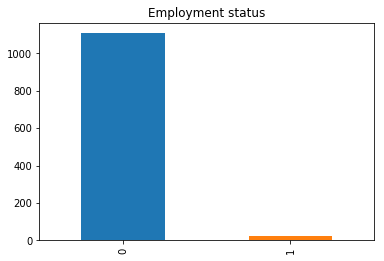

In [90]:
v.plot(kind='bar')
plt.title('Employment status');

#### Conclusion- Most of the graduates are employed full time,but the red column indicates that people drop out from the course and are not interested in working in that particular field. If we combine the red and green columns the rate of unemployment is high which shows that non technical grads fnd it difficult to get in to the tech field

## Question-2:What are the most popular programming languages in future

In [43]:
# filter top 10 programming languages
lang = df.LanguageDesireNextYear.value_counts()[:10]

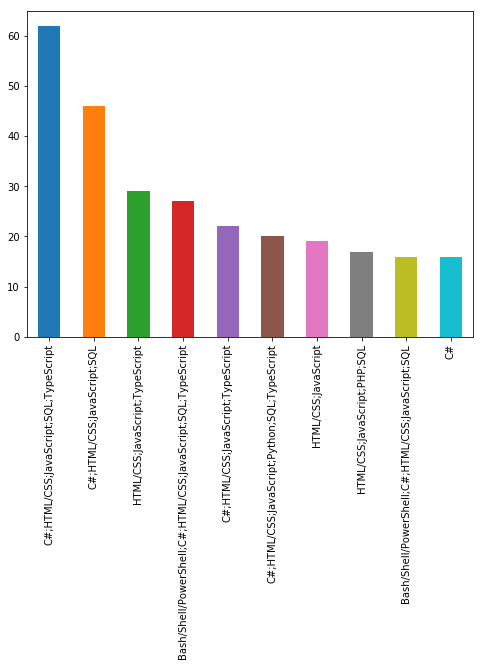

In [82]:
plt.figure(figsize=[8,6])

lang.plot(kind='bar');

#### Conclusion- Most of the programmers prefer to learn python in the upcomming years making it the most popular language

## Quesion-3 what determines the good quality of life? how to predict the quality of life and features involved in predicting it?

To answer this question we need to find use the decision tree classification model to use the categorial variables to predict the response

In [68]:
#fill the null values with mean
df.WorkWeekHrs.fillna(df.WorkWeekHrs.mean(),inplace=True)

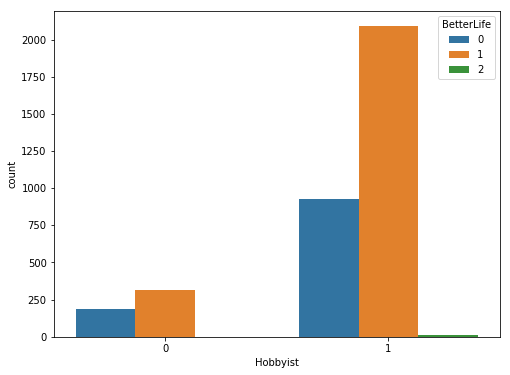

In [81]:
# use the countplot to plot the realtionship between 2 qualitative variables
plt.figure(figsize=[8,6])
sns.countplot(data= df,x= 'Hobbyist',hue='BetterLife')

In [69]:
# create the list of categorial variables you wnat to work with
col=['WorkChallenge','Student','BetterLife','Hobbyist','Employment']

In [70]:
# use the label encoder to convert the string to integer 
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['WorkChallenge'] = le.fit_transform(df['WorkChallenge'].astype(str))
df['Student'] = le.fit_transform(df['Student'].astype(str))
df['BetterLife'] = le.fit_transform(df['BetterLife'].astype(str))
df['Hobbyist'] = le.fit_transform(df['Hobbyist'].astype(str))      
df['Employment'] = le.fit_transform(df['Employment'].astype(str)) 

In [71]:
df2=df.copy()

In [72]:
# Drop the null values
df.dropna(axis=0,inplace=True)

In [29]:
df.isnull().sum()

Respondent        0
MainBranch        0
Hobbyist          0
OpenSourcer       0
OpenSource        0
Employment        0
Country           0
Student           0
EdLevel           0
UndergradMajor    0
EduOther          0
OrgSize           0
DevType           0
YearsCode         0
Age1stCode        0
YearsCodePro      0
CareerSat         0
JobSat            0
MgrIdiot          0
MgrMoney          0
MgrWant           0
JobSeek           0
LastHireDate      0
LastInt           0
FizzBuzz          0
JobFactors        0
ResumeUpdate      0
CurrencySymbol    0
CurrencyDesc      0
CompTotal         0
                 ..
Containers        0
BlockchainOrg     0
BlockchainIs      0
BetterLife        0
ITperson          0
OffOn             0
SocialMedia       0
Extraversion      0
ScreenName        0
SOVisit1st        0
SOVisitFreq       0
SOVisitTo         0
SOFindAnswer      0
SOTimeSaved       0
SOHowMuchTime     0
SOAccount         0
SOPartFreq        0
SOJobs            0
EntTeams          0


In [73]:
# use onhotencoder to split the numerical categorial data into many columns
from sklearn.preprocessing import OneHotEncoder 
onehotencoder = OneHotEncoder() 
onehotencoder.fit(df[col])
df_new = onehotencoder.transform(df[col]).toarray()     

C:\Users\Nik\Downloads\New folder\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [74]:
df_new.shape

(3537, 141)

In [75]:
ohe_df = pd.DataFrame(df_new, columns=list(onehotencoder.get_feature_names()))
ohe_df.reset_index()
ohe_df
df['BetterLife'].reset_index()
df_1 = pd.concat([ohe_df.reset_index(),df['BetterLife'].reset_index()], axis=1)

In [76]:
# Run the decision tree classification algorithm to use the categorial variables to predict the response
from sklearn import tree
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
X= df_1.drop('BetterLife',axis=1)
Y= df_1['BetterLife']
X_train, X_test, y_train, y_test = train_test_split( 
            X, Y, test_size = 0.3, random_state = 0) 
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf.predict(X_test)

array([1, 0, 0, ..., 1, 0, 1])

In [18]:
clf.score(X_test, y_test)

1.0

In [19]:
clf.score(X_train, y_train)

1.0